In [1]:
import pickle
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

In [2]:
filename = '/Users/rajeevpillay/Downloads/AS_routes.pickle'
with open(filename, 'rb') as file:
    G = pickle.load(file)


In [3]:
# Identify the core of the network
core_graph = nx.k_core(G)
core_nodes = set(core_graph.nodes())


In [4]:
# Assign layers to each node in the network
def assign_layers(graph, core_nodes):
    layers = {}
    for node in core_nodes:
        layers[node] = 0
    queue = deque(core_nodes)
    while queue:
        current_node = queue.popleft()
        current_layer = layers[current_node]
        for neighbor in graph.neighbors(current_node):
            if neighbor not in layers:
                layers[neighbor] = current_layer + 1
                queue.append(neighbor)
    return layers

layers_assignment = assign_layers(G, core_nodes)


In [5]:
# Count the nodes in each layer
layer_counts = {}
for layer in layers_assignment.values():
    layer_counts[layer] = layer_counts.get(layer, 0) + 1

In [9]:
# Calculate the percentage of each layer and round to 2 digits
total_nodes = len(G.nodes())
layer_info = {}
for layer, count in layer_counts.items():
    percentage = round((count / total_nodes) * 100, 2)
    layer_info[layer] = {'count': count, 'percentage': percentage}

# Sort the layer info by layer
sorted_layer_info = dict(sorted(layer_info.items()))

In [10]:
# Convert to pandas DataFrame for table creation
layer_df = pd.DataFrame.from_dict(sorted_layer_info, orient='index').reset_index()
layer_df.columns = ['Layer', 'Count', 'Percentage']
layer_df['Layer'] = layer_df['Layer'].apply(lambda x: f'Layer-{x}' if x > 0 else 'Core/Layer-0')


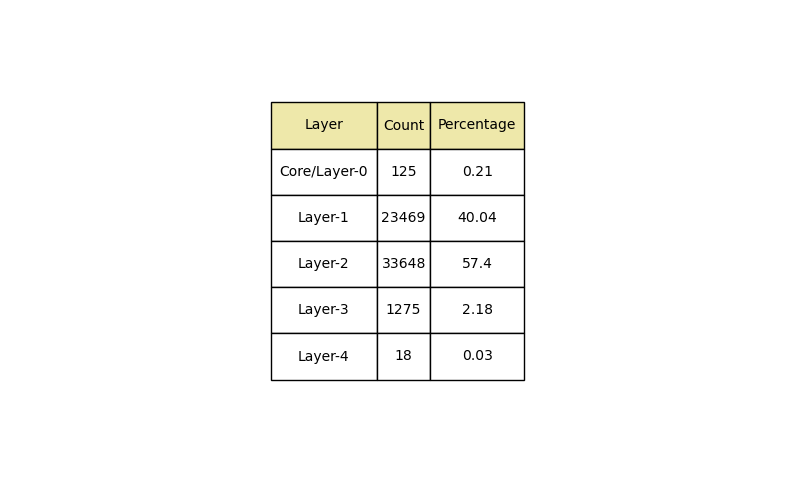

In [24]:
# Generate a matplotlib table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=layer_df.values, colLabels=layer_df.columns, loc='center', cellLoc='center', colColours=["palegoldenrod"] * 3)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(layer_df.columns))))
for cell in table.get_celld().values():
    cell.set_edgecolor('black')
    cell.set_height(0.1)

